## **07-3 신경망 모델 훈련**

### 7-3-1 손실 곡선



데이터 준비 (동일)

In [ ]:
from tensorflow import keras

(train, target1), (test, target2) = keras.datasets.fashion_mnist.load_data()

strain = train / 255.0

from sklearn.model_selection import train_test_split

strain, val, target1, target3 = train_test_split(strain, target1, random_state = 0, stratify=target1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


입력층과 출력층 사이에 은닉층이 하나 있는 모델에 또 다른 은닉층을 추가할 수 있는 함수 만들기.

In [ ]:
def m_f(layer=None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28, 28)))
    m.add(keras.layers.Dense(100, activation='relu'))

    if layer:
        m.add(layer)
    m.add(keras.layers.Dense(10, activation='softmax'))
    return m

먼저 함수 `m_f()`의 괄호 속에 아무 것도 넣지 않고 모델을 만들자.

In [ ]:
m = m_f()
m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

케라스의 `fit()` 메서드는 훈련 데이터를 입력받아 History 타입의 객체를 반환한다. 그 객체에는 훈련한 모델의 손실함수 값, 성능 값등이 `history`라는 이름의 딕셔너리로 들어있다([도움말](https://keras.io/api/models/model_training_apis/#fit-method)).

In [ ]:
m.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=m.fit(strain,target1,epochs=5,verbose=0)

`history` 딕셔너리에 어떤 키들이 있는지 살펴보자.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

`loss`에는 손실함수값, `accuracy`에는 정확도 값이 들어있다

In [ ]:
history.history['loss']

[0.5424225926399231,
 0.39853543043136597,
 0.3588933050632477,
 0.33755627274513245,
 0.32259976863861084]

In [ ]:
history.history['accuracy']

[0.8089110851287842,
 0.857355535030365,
 0.8706666827201843,
 0.8781999945640564,
 0.882888913154602]

`loss`와 `accuracy`를 그림으로 그려보자. 가로축은 epoch(0부터 4까지 다섯 개)다.

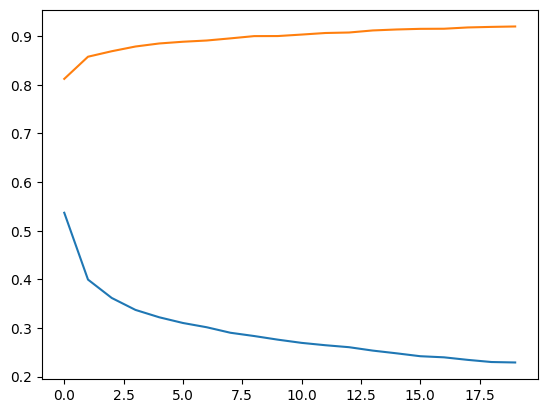

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

에포크가 거듭될수록 손실은 작아지고 정확도는 높아진다. 그렇다면 epoch를 20으로 늘여보자.

In [ ]:
m = m_f()
m.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = m.fit(strain, target1, epochs=20, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


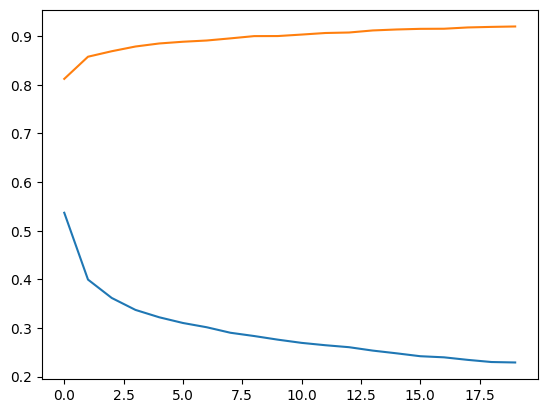

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

그림을 보면 epoch가 커질수록 손실이 줄어드는 것을 알 수 있다. 에포크가 거듭되면서 점점 좋은 모델을 훈련한 것일까?

그렇지 않다.

### **7-3-2 검증 손실**

`fit()`에 `validation_data`를 추가해서 검증 데이터에서 구한 손실도 `history`에 담아서 그려보자.

In [ ]:
m = m_f()
m.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = m.fit(strain, target1, epochs=20, verbose=0,validation_data=(val,target3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


`fit()`메서드의 괄호 속에 `validataion_data = `를 추가하면 반환되는 `history` 딕셔너리에 새로운 키들(`val_loss, val_accuracy`)이 생긴다.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

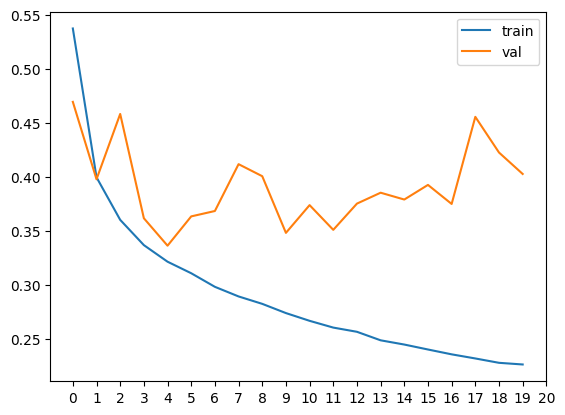

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

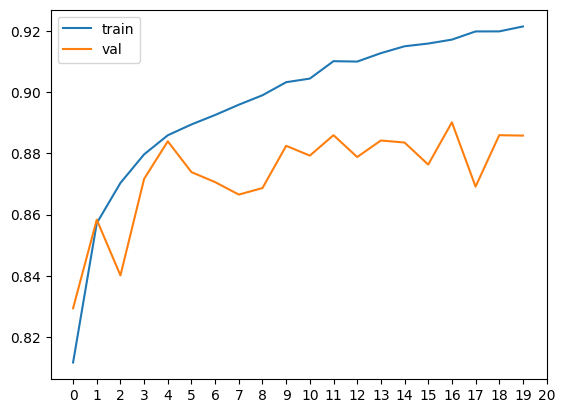

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

검증 데이터에서 구한 손실 그래프로부터 (네번째 또는 9번째 epoch부터, 교재의 결과와도 다르고 실행할 때마다 조금씩 다르다) 과대적합이 생긴 것을 알 수 있다.

과대적합을 피하는 방법이 여럿 있는데 여기서는 간단한 사례로 옵티마이저를 `rmsprop`에서 `adam`으로 바꿔보자.

In [ ]:
m = m_f()
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = m.fit(strain, target1, epochs=20, verbose=0,validation_data=(val,target3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


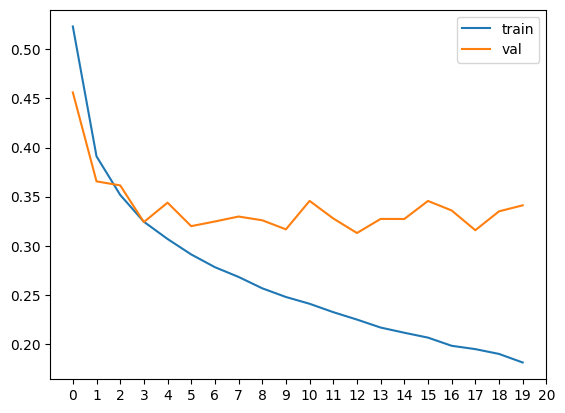

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

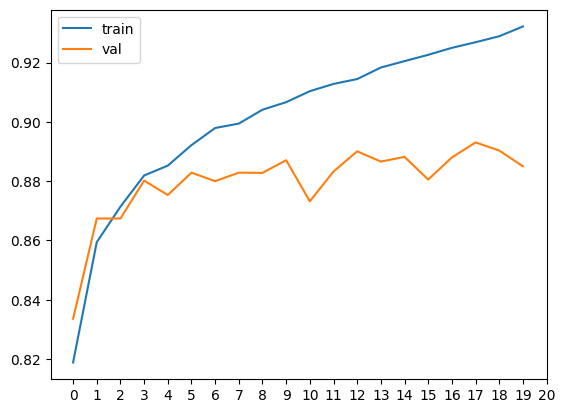

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

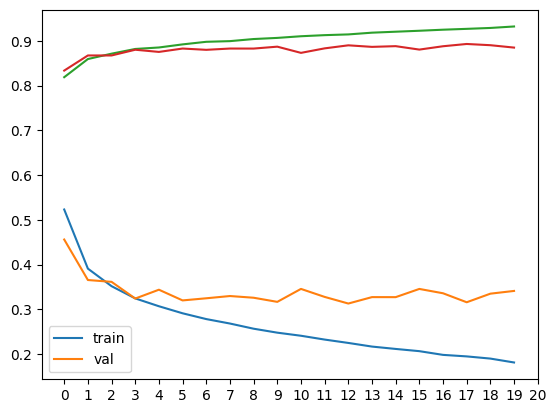

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

Text(0.5, 1.0, 'Accuracy')

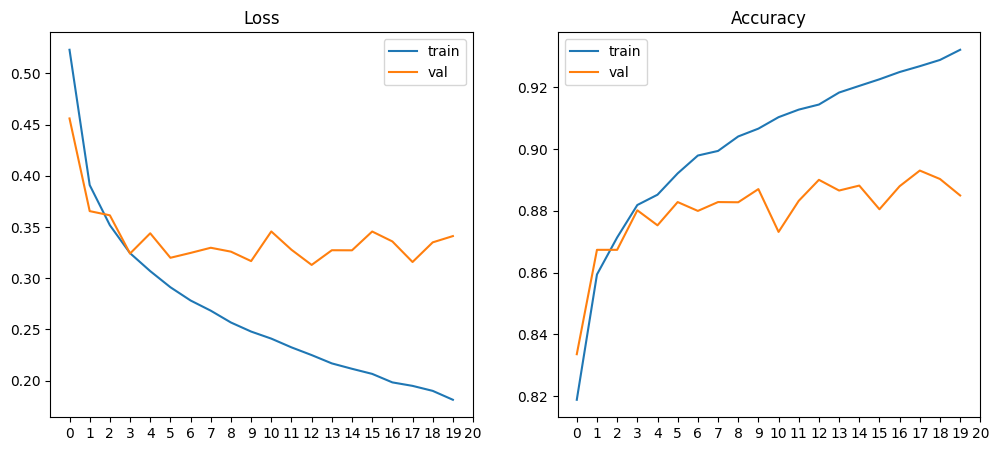

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_xticks(range(0, 21, 1))
axs[0].legend(['train', 'val'])
axs[0].set_title('Loss')

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_xticks(range(0, 21, 1))
axs[1].legend(['train', 'val'])
axs[1].set_title('Accuracy')

그림을 보면 과대적합 문제가 상당히 해소된 것을 알 수 있다.

### **7-3-3 드롭아웃**

'드롭아웃(dropout)'은 과대적합 문제를 해결하는 방법 중 하나다. 드롭아웃은 학습 과정 중에 임의로 일부 노드를 학습에서 제외시키는 방법이다(교재 401쪽 그림 참조).

드롭아웃을 이용하려면 `keras.layers` 다음에 `Dropout()`을 추가하면 된다. 괄호 속에는 제외시킬 노드의 비율을 적는다.

지금까지의 모델과 달리 이번에는 추가할 `keras.layers.Dropout()`을 앞서 만들어둔 함수 `model_fn()`의 괄호 속에 넣으면 된다.

In [ ]:
def m_f(layer=None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28, 28)))
    m.add(keras.layers.Dense(100, activation='relu'))

    if layer:
        m.add(layer)
    m.add(keras.layers.Dense(10, activation='softmax'))
    return m

In [ ]:
m=m_f(keras.layers.Dropout(0.3))
m.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

은닉층의 노드 100개 가운데 30%는 출력을 만들지 않도록 제외시켰다. 따라서 401쪽 그림처럼 어떤 샘플을 처리할 때에는 은닉층의 h1노드가 제외되고 또 다른 어떤 샘플을 처리할 때에는 h2 노드가 dropout되어 출력을 만들지 않는다.

이렇게 하면 특정 뉴런이 결과에 지나치게 큰 영향을 미치는 부작용을 피해서 과대적합을 완화시킬 수 있다. 또한 드롭아웃을 5장에서 트리모델을 공부할 때 배운 앙상블처럼, 즉 다른 신경망 모델을 여러 개 결합한 것으로 해석할 수도 있다.

In [ ]:
m=m_f(keras.layers.Dropout(0.3))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = m.fit(strain, target1, epochs=20, verbose=0,validation_data=(val,target3))

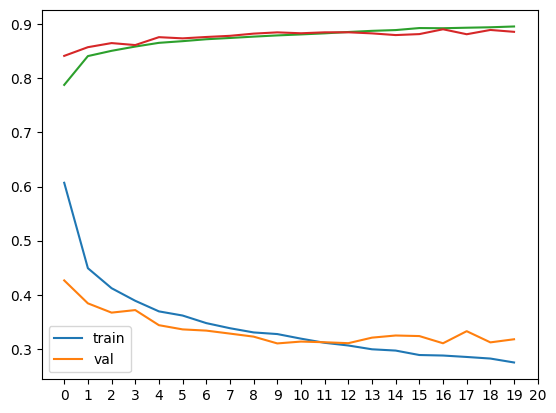

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 21, 1))
plt.legend(['train', 'val'])

Text(0.5, 1.0, 'Accuracy')

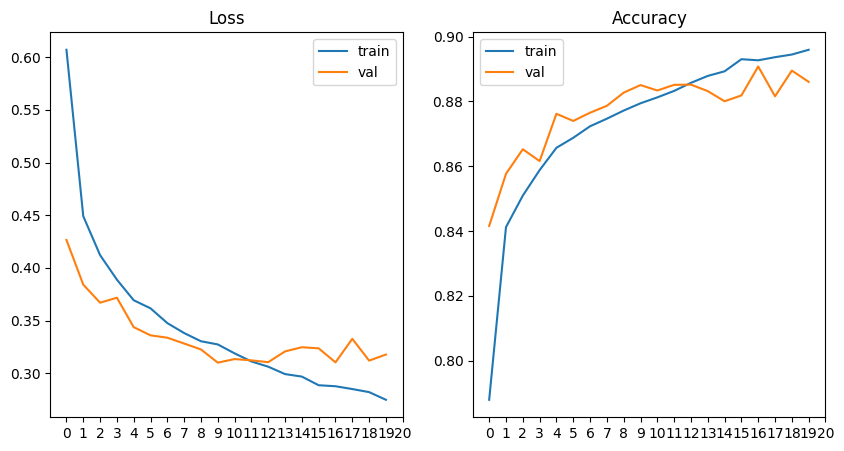

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_xticks(range(0, 21, 1))
axs[0].legend(['train', 'val'])
axs[0].set_title('Loss')

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_xticks(range(0, 21, 1))
axs[1].legend(['train', 'val'])
axs[1].set_title('Accuracy')

그림(교재와 약간 다르다)을 보면 epoch 11~12 부근에서 과대적합이 시작되는 것같다. 따라서 epoch를 20보다 줄이는 편이 낫겠다. (교재에서는 10회로 줄인다).

왜 드롭아웃이 필요할까?

드롭아웃으로 인해 샘플마다 다른 뉴런으로 학습하기 때문에 신경망 모델의 다양성이 더 높아져서 과대적합 문제를 해결하는 데 도움이 될 것으로 기대할 수 있다.

### **7-3-4 모델 저장과 복원**

앞 절에서 공부한 것을 정리해보자. 우리는 처음에 epoch를 20회로 정하고 모델을 훈련한 다음 각 epoch의 결과를 검증데이터의 손실값으로 비교해보았다. 손실함수 그림을 통해 알게 된 것은 20회의 epoch를 모두 훈련하기 전에 과대적합이 생긴다는 점이다.

(교재에서는) epoch가 10회일 때 validation data로 구한 손실이 가장 작아지는 것으로 보고 epoch를 10회로 제한해서 다시 모델을 훈련한다.

드롭아웃 비율은 역시 0.3으로 두고 epoch를 다시 10으로 바꿔서 모델을 훈련한 다음, 모델을 저장하고 저장한 모델을 불러서 이용해보자.

In [96]:
from tensorflow import keras

(train, target1), (test, target2) = keras.datasets.fashion_mnist.load_data()

strain = train / 255.0

from sklearn.model_selection import train_test_split

strain, val, target1, target3 = train_test_split(strain, target1, random_state = 0, stratify=target1)

In [97]:
def m_f(layer=None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28, 28)))
    m.add(keras.layers.Dense(100, activation='relu'))

    if layer:
        m.add(layer)
    m.add(keras.layers.Dense(10, activation='softmax'))
    return m

In [98]:
m=m_f(keras.layers.Dropout(0.3))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
m.fit(strain, target1, epochs=15, verbose=0,validation_data=(val,target3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


케라스에는 훈련 모델의 가중치(parameter)를 저장하는 `save_weights()`, 가중치와 함께 모델구조까지 저장하는 `save()` 함수가 있다. 괄호 안에는 저장할 파일 이름을 적어주면 된다.

아래 코드의 파일 이름에서 `h5`는 저장할 파일의 형식을 'hdf5(Hierarchical Data Format version 5)'로 지정한다는 의미다. 파일 확장자로 `h5`를 덧붙이지 않으면 기본 파일 형식인 'SavedModel'포멧으로 저장된다.

In [99]:
m.save_weights('mw.weights.h5')
m.save('fm.keras')

저장된 파일 확인.

In [100]:
!ls -al *.h5

-rw-r--r-- 1 root root 976600 Feb  8 13:09 mw.weights.h5


In [101]:
!ls -al *.keras

-rw-r--r-- 1 root root 979394 Feb  8 13:09 fm.keras


새로운 모델을 만들 때 이전에 저장된 파일을 불러서 활용하고 싶다면 `load_weights()`을 이용한다.

In [81]:
m = m_f(keras.layers.Dropout(0.3))

m.load_weights('mw.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* 유의할 사항 : 위의 모델 `model`은 함수 `model_fn()`를 통해 모델 정의만 했을 뿐이다. 즉 `complie, fit`과정을 거쳐 훈련한 모델이 아니다. 하지만 저장된 매개변수를 load해서 다른 데이터에 대한 결과를 예측할 수는 있다.

`val`에는 15,000개의 검증 데이터가 들어있다.

In [82]:
val.shape

(15000, 28, 28)

위의 모델로 검증 데이터의 예측결과를 알아보자. <u>케라스의 `predict()` 함수는 각 샘플마다 타깃 범주들의 예측확률을 구해준다.</u>

가령 `val_scaled` 데이터의 첫 두 개 샘플에 대해 예측확률을 알아보자.(모델 정확도 검증에 `evaluate()`를 이용하지 않는 이유는? 406쪽 설명 참조).

In [83]:
val[:2].shape

(2, 28, 28)

In [84]:
m.predict(val[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[1.5331851e-08, 3.9357857e-14, 1.7541926e-07, 2.7566976e-10,
        7.0047122e-06, 4.3147655e-10, 2.0019737e-09, 4.2720127e-13,
        9.9999285e-01, 6.0901399e-16],
       [8.3433503e-01, 4.1799834e-07, 2.2404418e-05, 7.3099146e-03,
        6.3431759e-07, 2.3933210e-12, 1.5832473e-01, 7.4212525e-20,
        7.0072792e-06, 3.4641726e-14]], dtype=float32)

위의 결과를 보고 그 두 샘플의 범주를 예측해보자.

In [64]:
import numpy as np

np.argmax(m.predict(val[:2]), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([8, 0])

`axis = `에 대한 설명은 교재 406-7쪽 그림 참조.

결과를 보면 `val_scaled`의 처음 두 개 데이터의 예측값은 모두 8이다. 두 데이터의 실제값은?

In [65]:
target3[:2]

array([8, 0], dtype=uint8)

이제 15,000개 전체 검증 데이터를 가지고 정확도를 알아보자.

In [102]:
import numpy as np

pred=np.argmax(m.predict(val),axis=1)
np.mean(pred==target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8848666666666667

이번에는 `save()`메서드를 이용해서 저장한 모델의 구조와 파라미터 모두를 불러오자

 `keras.models`안에 있는 `load_model()`을 이용하여 가져올 수 있다.

 그 모델로 검증 데이터에서의 정확도를 알아보자. 이번에는 바로 `evaluate()`를 이용할 수 있다.

In [103]:
m=keras.models.load_model('fm.keras')

In [104]:
m.evaluate(val, target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8881 - loss: 0.3047


[0.3192771375179291, 0.8848666548728943]

### **7-3-5 콜백**

케라스에는 `callbacks`라는 모듈이 있는데 이를 이용하면 훈련 과정 도중에 어떤 작업을 수행할 수 있다. 여기서는 `callbacks` 안에 있는 `ModelCheckpoint()`와 `EarlyStopping()`에 대해 살펴보자.

아래에 나오는 `callbacks.ModelCheckpoint()`는 에포크마다 모델을 저장해준다. `save_best_only = True`라고 지정하면 모든 에포크가 아니라 가장 성능이 좋은 모델(즉 검증 데이터에서 손실이 가장 작은 모델)을 저장한다. `ModelCheckpoint()`의 객체를 `checkpoint_cb`라고 이름 붙이자.

In [105]:
m=m_f(keras.layers.Dropout(0.3))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cb = keras.callbacks.ModelCheckpoint('bm.keras',save_best_only=True)
m.fit(strain, target1, epochs=20, verbose=0,validation_data=(val,target3),callbacks=[cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


위에서 만든 객체를 아래 `fit()` 안에 있는 `callbacks`라는 매개변수에 리스트로 전달한다. 훈련이 끝나면 가장 좋은 모델이 `best-model.h5`라는 파일에 저장될 것이다(실행시간 1분 이상).

`load_model()`을 이용해서 가장 좋은 모델을 불러서 검증 데이터에서의 정확도를 알아보자.

In [106]:
m = keras.models.load_model('bm.keras')
m.evaluate(val, target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8946 - loss: 0.2937


[0.30381882190704346, 0.8900666832923889]

가장 좋은 모델이 나온 에포크 이후에는 과대적합 문제가 생길 것이므로 훈련을 계속할 필요가 없을 것이다. 이럴 경우 `callbacks` 모듈의 `EarlyStopping()`을 이용하여 적절히 훈련을 조기종료할 수 있다.

아래 코드에서 `patience = 2`는 두 번 연속해서 성능이 좋아지지 않으면 훈련을 중단하라는 뜻이다. 또한 `restore_best_weights=True`는 최종 모델이 아니라 가장 성능이 좋은 모델로 돌아가서 그 모델의 파라미터를 저장하라는 의미다.

아래 코드는 ModelCheckpoint 콜백(`checkpoint_cb`), 그리고 EarlyStopping 콜백(`early_stopping_cb`) 둘을 함께 사용한 경우다.

In [110]:
m=m_f(keras.layers.Dropout(0.3))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cb1 = keras.callbacks.ModelCheckpoint('bm.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=m.fit(strain, target1, epochs=20, verbose=0,validation_data=(val,target3),callbacks=[cb1,cb2])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


훈련이 중단된 epoch를 확인하려면

In [111]:
cb2.stopped_epoch

8

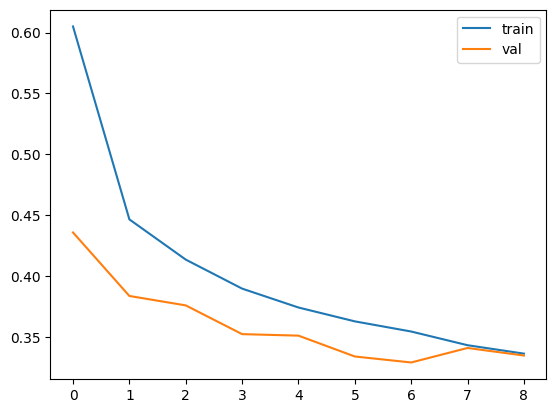

In [112]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

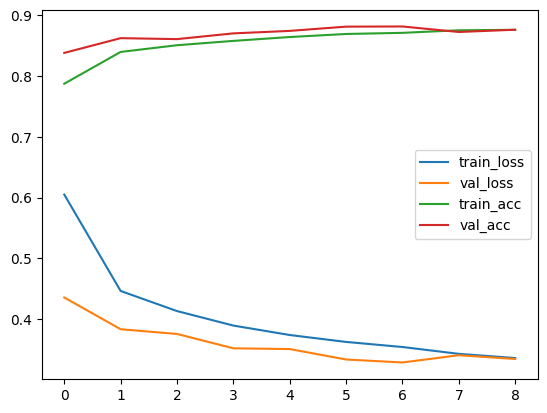

In [123]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 9, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 9, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])

In [124]:
m.evaluate(val, target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8833 - loss: 0.3193


[0.3289051353931427, 0.8814666867256165]